# Supervised Learning Evaluation Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as stl
stl.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
stl.use("seaborn")

# Regression
### Example: House Prices

This section deals with processing & exploratory analysis. Feel free to skip to the metrics section.

In [3]:
data = pd.read_csv("../input/housesalesprediction/kc_house_data.csv")

In [4]:
data.shape

(21613, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data.drop(["id", "date"], axis=1, inplace=True)

In [9]:
n = data.shape[1]
n

19

In [10]:
categoricals = ["bedrooms","bathrooms","floors","waterfront","view"]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

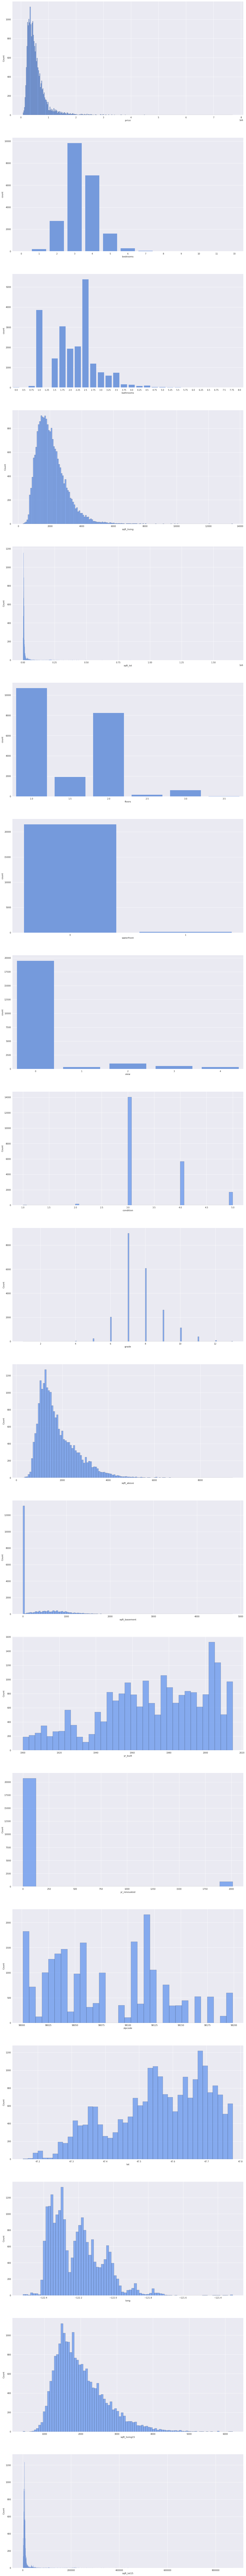

In [12]:
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(20, n*12))

for i in range(n):
    col = data.columns[i]
    if col in categoricals:
        sns.countplot(x=col, data=data,color="cornflowerblue", ax=axes[i])
    else:
        sns.histplot(x=col, data=data,color="cornflowerblue", ax=axes[i])
plt.show()


In [13]:
data.drop(["zipcode","yr_renovated"], axis=1, inplace=True)

In [14]:
data.shape

(21613, 17)

In [15]:
x = data.drop("price", axis=1, inplace=False)
y = data["price"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(xtrain)
xtrain = ss.transform(xtrain)
xtest = ss.transform(xtest)

### Modelling

In [19]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [21]:
linreg = LinearRegression()

In [22]:
linreg.fit(xtrain, ytrain)

LinearRegression()

In [23]:
ypred_train = linreg.predict(xtrain)
ypred_test = linreg.predict(xtest)

### Regression Metrics:
**Mean Absolute Error (MAE)**  
![](https://i.imgur.com/19LNbyQ.jpg)  


**Maximum Error**  
$\text{Max Error}(y, \hat{y}) = max(| y_i - \hat{y}_i |)$  


**R2 Score**  
![](https://miro.medium.com/max/1200/1*_HbrAW-tMRBli6ASD5Bttw.png)  

In [24]:
from sklearn.metrics import r2_score, max_error
from sklearn.metrics import mean_absolute_error as mae

**MAE is basically the average error that your model makes**  

In [25]:
print("Training MAE:\n")
print(mae(ytrain, ypred_train))

print("\n\nTesting MAE:\n")
print(mae(ytest, ypred_test))

Training MAE:

126894.03033441117


Testing MAE:

123267.09781704018


In [26]:
print("Training Maximum Error:\n")
print(max_error(ytrain, ypred_train))

print("\n\nTesting Maximum Error:\n")
print(max_error(ytest, ypred_test))

Training Maximum Error:

4362472.4918066235


Testing Maximum Error:

3988927.367274423


In [27]:
print("Training R2_Score:\n")
print(r2_score(ytrain, ypred_train))

print("\n\nTesting R2_Score:\n")
print(r2_score(ytest, ypred_test))

Training R2_Score:

0.6944208068288157


Testing R2_Score:

0.6973562623365923


In [28]:
tree = DecisionTreeRegressor()

In [29]:
tree.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [30]:
ypred_train = tree.predict(xtrain)
ypred_test = tree.predict(xtest)

In [31]:
print("Training MAE:\n")
print(mae(ytrain, ypred_train))

print("\n\nTesting MAE:\n")
print(mae(ytest, ypred_test))

Training MAE:

1031.969358901856


Testing MAE:

103331.47502312674


In [32]:
print("Training Maximum Error:\n")
print(max_error(ytrain, ypred_train))
print("\n\nTesting Maximum Error:\n")
print(max_error(ytest, ypred_test))

Training Maximum Error:

264975.0


Testing Maximum Error:

2668000.0


In [33]:
print("Training R2_Score:\n")
print(r2_score(ytrain, ypred_train))

print("\n\nTesting R2_Score:\n")
print(r2_score(ytest, ypred_test))

Training R2_Score:

0.9992006472262589


Testing R2_Score:

0.7293960931045138


# Classification
### Example 1: Pulsar Detection

In [34]:
mydata = pd.read_csv("../input/predicting-pulsar-starintermediate/pulsar_data_train.csv")

In [35]:
mydata.shape

(12528, 9)

In [36]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [37]:
mydata.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [38]:
target = mydata["target_class"]
features = mydata.drop("target_class", axis=1)

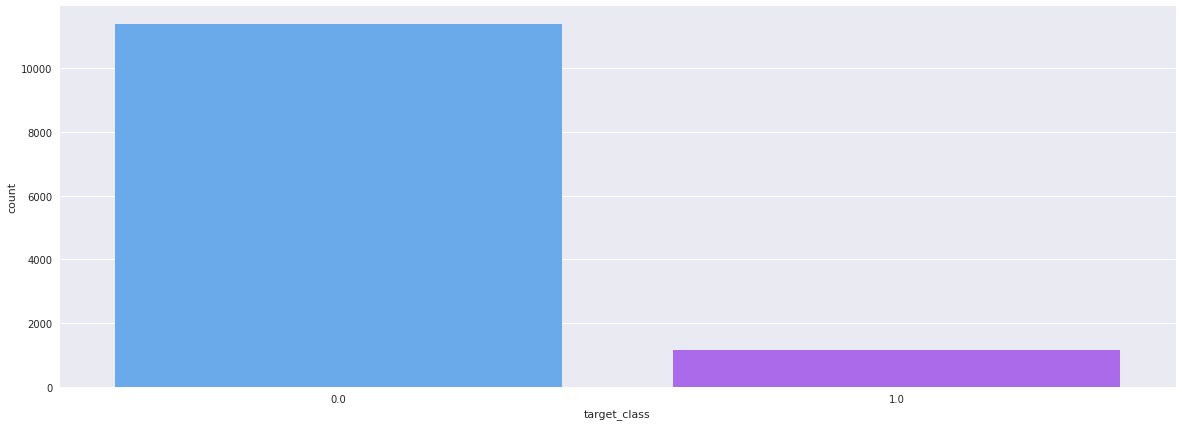

In [39]:
plt.figure(figsize=(20,7))
sns.countplot(x="target_class", data=mydata, palette="cool")
plt.show()

In [40]:
list(features.columns)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve']

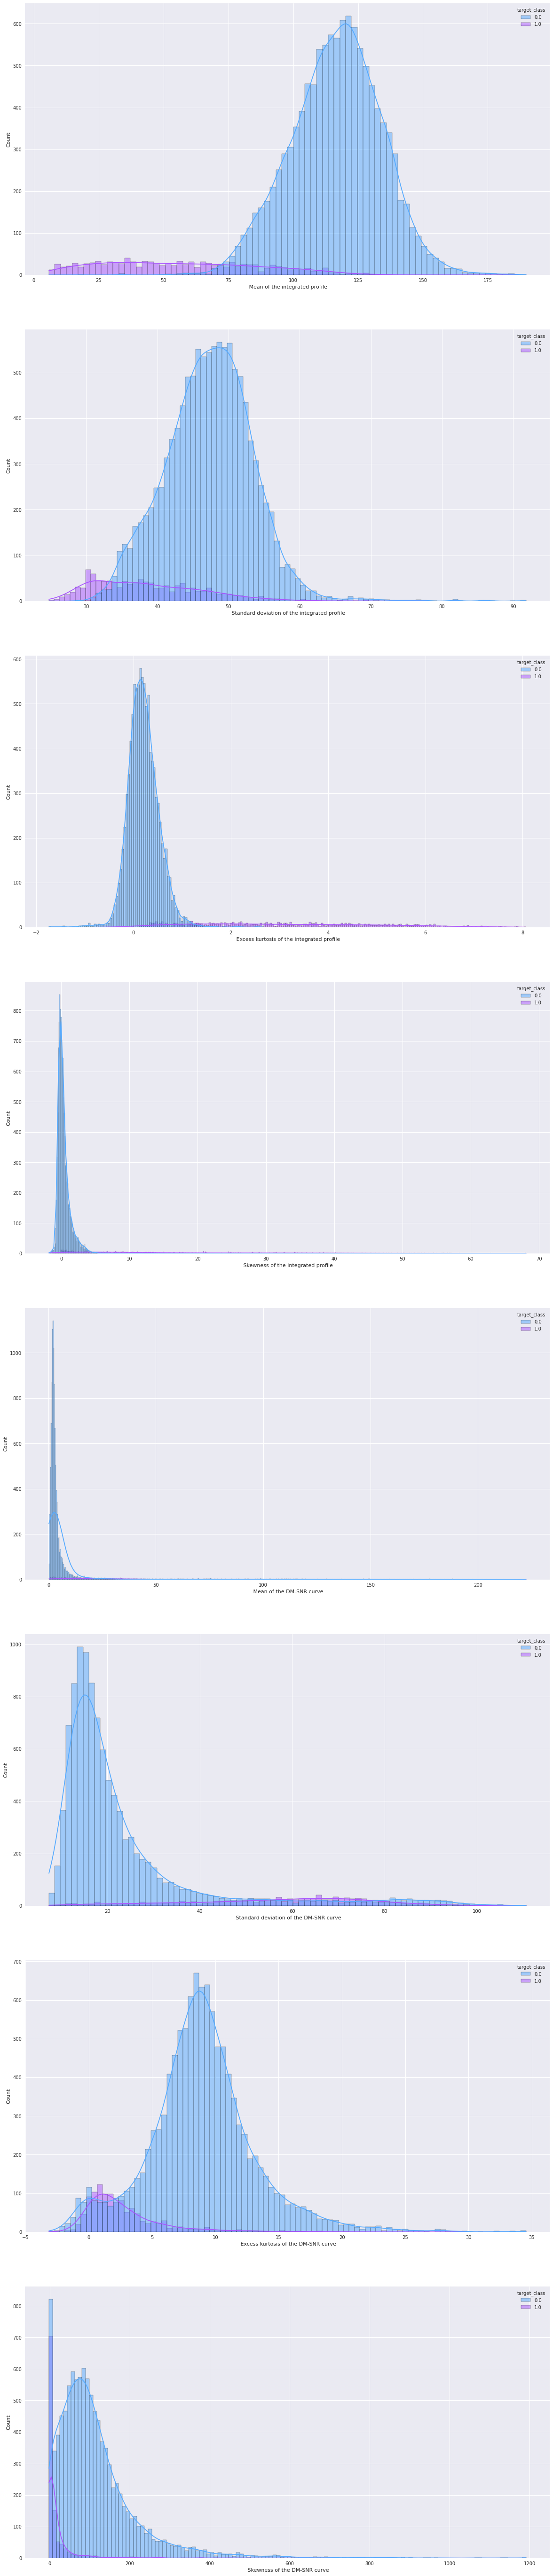

In [41]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(20,100))
for i in range(len(features.columns)):
    col = features.columns[i]
    sns.histplot(x=mydata[col], hue=target, palette="cool", kde=True, ax=axes[i])
plt.show()

In [42]:
missing_perc = 100 * mydata.isna().sum() / mydata.shape[0]
missing_perc

 Mean of the integrated profile                   0.000000
 Standard deviation of the integrated profile     0.000000
 Excess kurtosis of the integrated profile       13.848978
 Skewness of the integrated profile               0.000000
 Mean of the DM-SNR curve                         0.000000
 Standard deviation of the DM-SNR curve           9.402937
 Excess kurtosis of the DM-SNR curve              0.000000
 Skewness of the DM-SNR curve                     4.988825
target_class                                      0.000000
dtype: float64

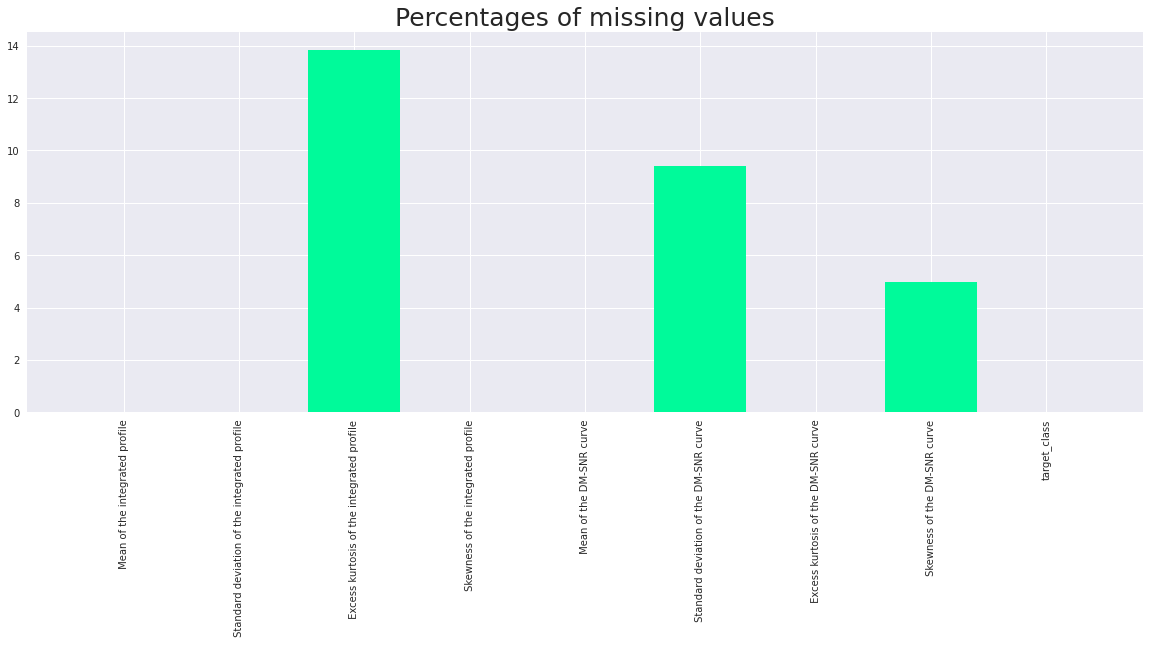

In [43]:
plt.figure(figsize=(20,7))
plt.bar(missing_perc.index, missing_perc, color="mediumspringgreen")
plt.xticks(missing_perc.index, rotation="vertical")
plt.title("Percentages of missing values", fontsize=25)
plt.show()

In [44]:
mydata = mydata.fillna(mydata.median())

In [45]:
mydata.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [46]:
features = mydata.drop('target_class', axis=1)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.1)

In [49]:
print(xtrain.shape)
print(xtest.shape)

(11275, 8)
(1253, 8)


In [50]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [51]:
ss.fit(xtrain)
xtrain_array = ss.transform(xtrain)
xtest_array = ss.transform(xtest)

In [52]:
xtrain = pd.DataFrame(xtrain_array, columns = xtrain.columns)
xtest = pd.DataFrame(xtest_array, columns=xtest.columns)

### Modelling

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [54]:
logreg = LogisticRegression(solver='liblinear')
tree = DecisionTreeClassifier()

In [55]:
logreg.fit(xtrain, ytrain)
tree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
logreg_ypred_train = logreg.predict(xtrain)
logreg_ypred_test = logreg.predict(xtest)

tree_ypred_train = tree.predict(xtrain)
tree_ypred_test = tree.predict(xtest)

### Confusion Matrix  
![](https://miro.medium.com/max/1000/1*fxiTNIgOyvAombPJx5KGeA.png)

In [58]:
train_con_mat_logreg = confusion_matrix(ytrain, logreg_ypred_train)
test_con_mat_logreg = confusion_matrix(ytest, logreg_ypred_test)

train_con_mat_tree = confusion_matrix(ytrain, tree_ypred_train)
test_con_mat_tree = confusion_matrix(ytest, tree_ypred_test)

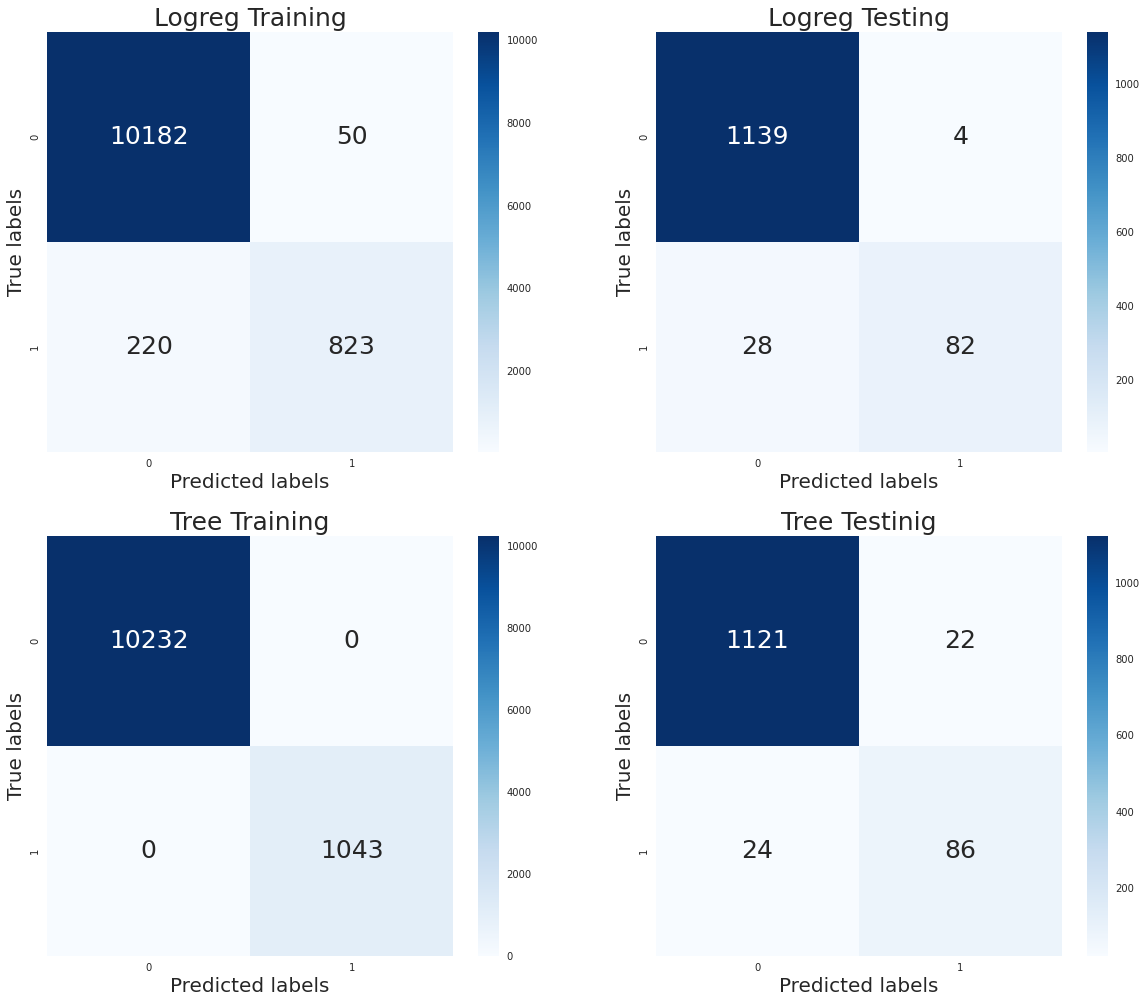

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,17))
matrices = [train_con_mat_logreg, test_con_mat_logreg, train_con_mat_tree, test_con_mat_tree]
titles = ["Logreg Training", "Logreg Testing", "Tree Training", "Tree Testinig"]
for index in range(4):
    i, j = index//2, index%2
    sns.heatmap(matrices[index], annot=True, fmt="g", annot_kws={"fontsize":25}, cmap="Blues", ax=axes[i,j])
    axes[i,j].set_xlabel('Predicted labels', fontsize=20)
    axes[i,j].set_ylabel('True labels', fontsize=20)
    axes[i,j].set_title(titles[index], fontsize=25)
plt.show()

#### Accuracy:
![](https://www.mydatamodels.com/wp-content/uploads/2020/10/2.-Accuracy-formula-machine-learning-algorithms.png)
#### Precision & Recall:
![](https://miro.medium.com/max/888/1*7J08ekAwupLBegeUI8muHA.png)  
#### F1 Score:
![](https://datascience103579984.files.wordpress.com/2019/04/capture3-24.png)  
  
  
![](https://miro.medium.com/max/1400/1*5_ZAlFhlCk8llhnYWD5PXw.png)

In [60]:
print("Logreg Training Results:\n")
print(classification_report(ytrain, logreg_ypred_train))
print("\nLogreg Testing Results:\n")
print(classification_report(ytest, logreg_ypred_test))

Logreg Training Results:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     10232
         1.0       0.94      0.79      0.86      1043

    accuracy                           0.98     11275
   macro avg       0.96      0.89      0.92     11275
weighted avg       0.98      0.98      0.98     11275


Logreg Testing Results:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1143
         1.0       0.95      0.75      0.84       110

    accuracy                           0.97      1253
   macro avg       0.96      0.87      0.91      1253
weighted avg       0.97      0.97      0.97      1253



In [61]:
print("\n\nTree Training Results:\n")
print(classification_report(ytrain, tree_ypred_train))
print("\nTree Testing Results\n")
print(classification_report(ytest, tree_ypred_test))



Tree Training Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10232
         1.0       1.00      1.00      1.00      1043

    accuracy                           1.00     11275
   macro avg       1.00      1.00      1.00     11275
weighted avg       1.00      1.00      1.00     11275


Tree Testing Results

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1143
         1.0       0.80      0.78      0.79       110

    accuracy                           0.96      1253
   macro avg       0.89      0.88      0.88      1253
weighted avg       0.96      0.96      0.96      1253



### Example2: Heart Disease/Attack

In [62]:
ledata = pd.read_csv("../input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv")

In [63]:
ledata.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [64]:
ledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [65]:
ledata.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [66]:
stl.use("fivethirtyeight")

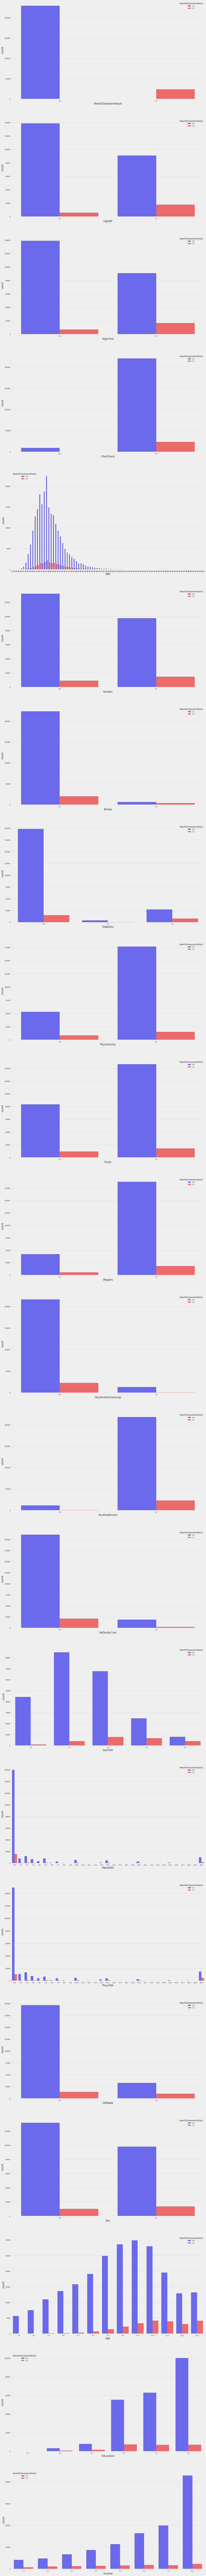

In [67]:
fig, axes = plt.subplots(nrows=ledata.shape[1], ncols=1, figsize=(20,13*ledata.shape[1]))
for i in range(len(ledata.columns)):
    col = ledata.columns[i]
    sns.countplot(x=col, data=ledata, hue="HeartDiseaseorAttack", palette="seismic", ax=axes[i])
plt.show()

In [68]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
ledata_array = rs.fit_transform(ledata)
ledata = pd.DataFrame(ledata_array, columns=ledata.columns)

In [69]:
features = ledata.drop("HeartDiseaseorAttack", axis=1)
target = ledata["HeartDiseaseorAttack"]

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.1)

In [71]:
tree = DecisionTreeClassifier()

In [72]:
tree.fit(xtrain, ytrain)

ypred_train = tree.predict(xtrain)
ypred_test = tree.predict(xtest)

In [73]:
print("Training Results\n")
print(classification_report(ytrain, ypred_train))

Training Results

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    206842
         1.0       1.00      0.96      0.98     21470

    accuracy                           1.00    228312
   macro avg       1.00      0.98      0.99    228312
weighted avg       1.00      1.00      1.00    228312



In [74]:
print('Testing Results\n')
print(classification_report(ytest, ypred_test))

Testing Results

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     22945
         1.0       0.25      0.27      0.26      2423

    accuracy                           0.85     25368
   macro avg       0.58      0.59      0.59     25368
weighted avg       0.86      0.85      0.85     25368



## More on Overfitting & Underfitting (Variance & Bias)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Traintest.svg/700px-Traintest.svg.png)
![](https://miro.medium.com/max/1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)  
![](https://miro.medium.com/max/544/1*Y-yJiR0FzMgchPA-Fm5c1Q.jpeg)  
![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)  
![](https://www.researchgate.net/publication/339680577/figure/fig2/AS:865364518924290@1583330387982/llustration-of-the-underfitting-overfitting-issue-on-a-simple-regression-case-Data.png) 
![](https://miro.medium.com/max/2000/1*MgmJ6_TuqTWIzmsL6boMng.png)
![](https://bradleyboehmke.github.io/HOML/07-decision-trees_files/figure-html/pruned-tree-1.png)